<a href="https://colab.research.google.com/github/tinkercademy/ml-notebooks/blob/main/Machine Learning in Pytorch/05_Computer_Vision_with_CNN_with_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Improving Computer Vision Accuracy using Convolutions

In the previous lessons you saw how to do fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. You experimented with the impact of different sized of hidden layer, number of training epochs etc on the final accuracy.


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import numpy as np


transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
 
trainset = torchvision.datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)
 
batch_size = 32
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)


In [2]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(1, 6, kernel_size=(3,3), stride=1, padding=1) 
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        self.conv2 = nn.Conv2d(6, 12, kernel_size=(3,3), stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
 
        self.flat = nn.Flatten()
        self.fc3 = nn.Linear(588, 128) 
        self.fc4 = nn.Linear(128, 10) 

        self.dropout = nn.Dropout(0.2)
 
    def forward(self, x):
        x = self.dropout(F.relu(self.conv1(x)))
        x = self.pool1(x)

        x = self.dropout(F.relu(self.conv2(x)))
        x = self.pool2(x)

        x = self.flat(x)
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x


In [3]:
model = Classifier()
#defining the loss function
loss_fn = nn.CrossEntropyLoss() 
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

n_epochs = 20
for epoch in range(n_epochs):
    for inputs, labels in trainloader:
        # forward, backward, and then weight update
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = 0
    count = 0
    for inputs, labels in testloader:
        y_pred = model(inputs)
        acc += (torch.argmax(y_pred, 1) == labels).float().sum()
        count += len(labels)
    acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

torch.save(model.state_dict(), "model.pth")

Epoch 0: model accuracy 74.88%
Epoch 1: model accuracy 79.36%
Epoch 2: model accuracy 80.95%
Epoch 3: model accuracy 83.77%
Epoch 4: model accuracy 84.69%
Epoch 5: model accuracy 85.06%
Epoch 6: model accuracy 86.41%
Epoch 7: model accuracy 86.01%
Epoch 8: model accuracy 86.83%
Epoch 9: model accuracy 87.58%
Epoch 10: model accuracy 87.71%
Epoch 11: model accuracy 87.52%
Epoch 12: model accuracy 87.57%
Epoch 13: model accuracy 88.28%
Epoch 14: model accuracy 88.42%
Epoch 15: model accuracy 88.49%
Epoch 16: model accuracy 88.69%
Epoch 17: model accuracy 88.59%
Epoch 18: model accuracy 88.95%
Epoch 19: model accuracy 88.45%


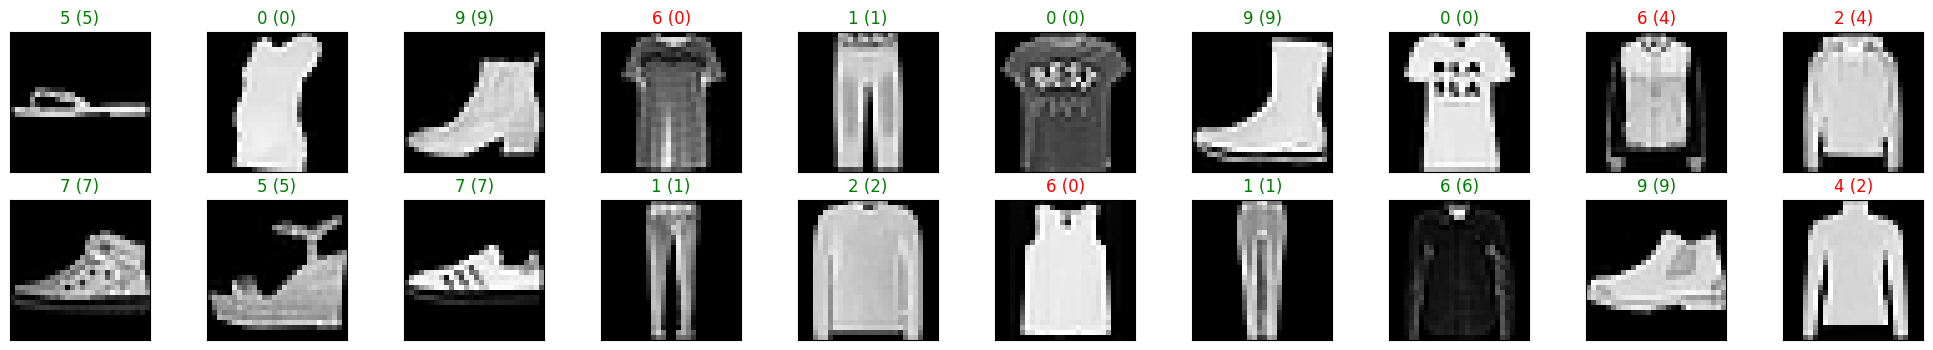

In [8]:
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap="gray")
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))